In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

## Reading the Dataset
I first read the csv file and the used head() to see the first 6 rows of the dataset. Then I used the describe(). It shows us a quick overview of the data.Like the count,mean,standard deviation,minimum and maximum elemnts. The info() gives us information about the data and the type of data.The unique() gives us all the unique objects here it is used to see all the unique objects in the Species column. We also check for null values in this dataset there are no null values. 

In [2]:
df = pd.read_csv('iris.csv')
df.head(6)

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
df.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
species = df['Species'].unique()
species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [7]:
df.isnull().sum()

Sepal_length    0
Sepal_width     0
Petal_length    0
Petal_width     0
Species         0
dtype: int64

## Visualize the data

<AxesSubplot:>

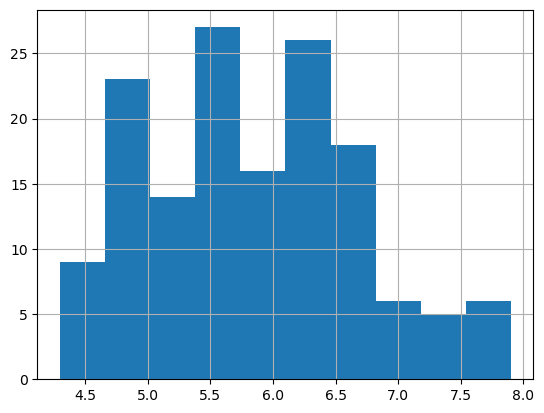

In [8]:
df['Sepal_length'].hist()

<AxesSubplot:>

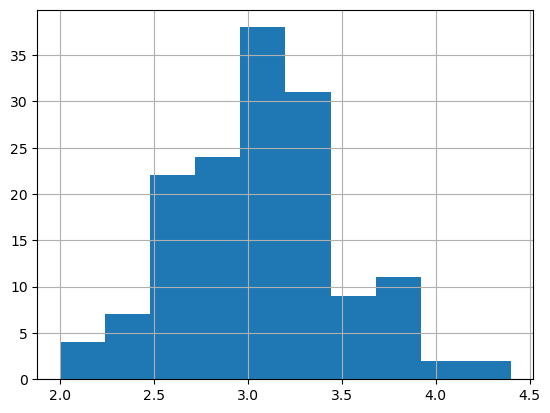

In [9]:
df['Sepal_width'].hist()

<AxesSubplot:>

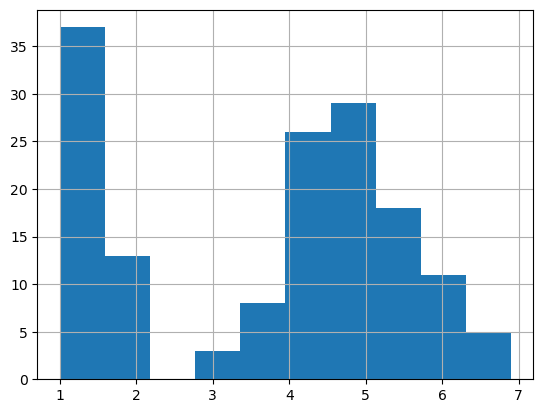

In [10]:
df['Petal_length'].hist()

<AxesSubplot:>

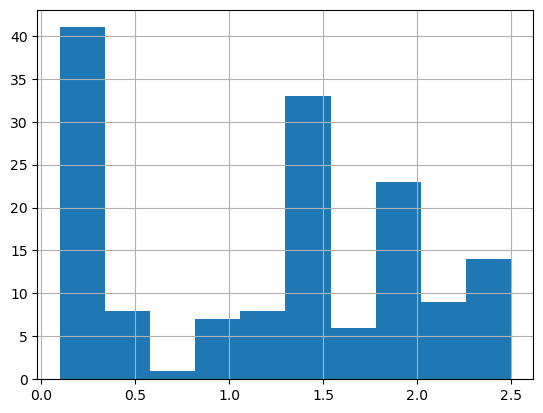

In [11]:
df['Petal_width'].hist()

In [12]:
color = ['red','green','blue']

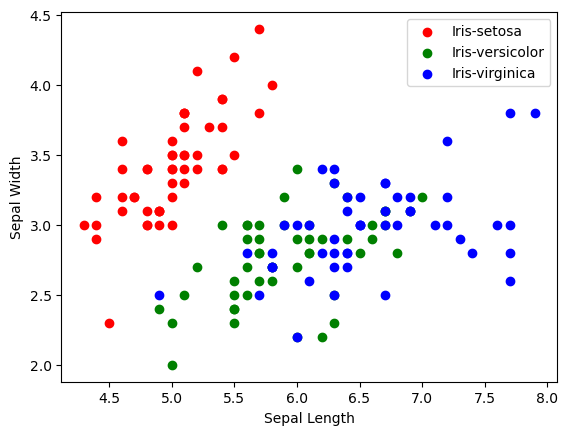

In [13]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['Sepal_length'], x['Sepal_width'], c = color[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

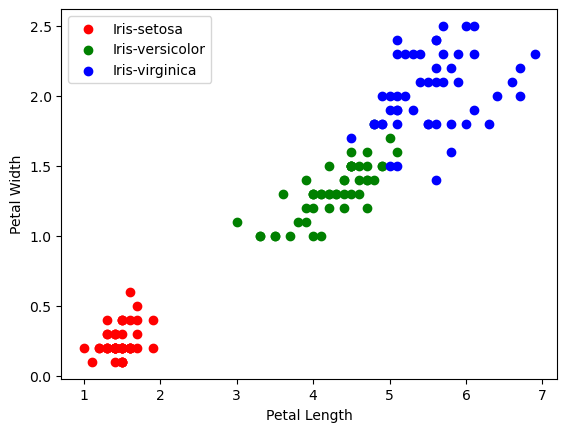

In [14]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['Petal_length'], x['Petal_width'], c = color[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

--------------------------------------------------------------------------------------------------------------------------
We use a correlation matrix here.A correlation matrix is simply a table showing the correlation coefficients between variables.

In [15]:
df.corr()

,Sepal_length,Sepal_width,Petal_length,Petal_width
Sepal_length,1.000000,-0.109369,0.871754,0.817954
Sepal_width,-0.109369,1.000000,-0.420516,-0.356544
Petal_length,0.871754,-0.420516,1.000000,0.962757
Petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

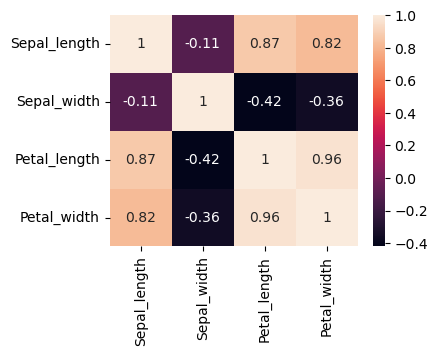

In [16]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(corr, annot=True, ax=ax)

---------------------------------------------------------------------------------------------------------------------------
The target variable is in string form this needs to be converted to numeric form or machine-readable form.

In [17]:
from sklearn.preprocessing import LabelEncoder
labl = LabelEncoder()

In [18]:
df['Species'] = labl.fit_transform(df['Species'])
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Splitting dataset into traning and test

In [19]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

Here I used the LogisticRegression model.It is a supervised learning algorithm.The logistic regression model makes use of a logistic function (also called sigmoid function) that maps any input value to a probability.The probability value ranges between 0 and 1, with values closer to 1 indicating a higher likelihood of the event occurring and values closer to 0 indicating a lower likelihood.Here the solver='lbfgs' parameter specifies the optimization algorithm used to train the logistic regression model.The max_iter parameter specifies the maximum number of iterations allowed for the optimization algorithm to converge to an optimal solution.

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)

Now I use score().It is a method used to evaluate the performance of a trained model on a test dataset. It is used to calculate the accuracy of the model's predictions on the test dataset. A score of 1 indicates perfect accuracy, while a score of 0 indicates that the model's predictions are completely wrong.

In [21]:
model.fit(x_train, y_train)
print("Accuracy: ",model.score(x_test, y_test) * 100,"%")

Accuracy:  96.66666666666667 %
